In [ ]:
import kaggle
import pandas as pd
import matplotlib.pyplot as plt

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


In [ ]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files("radheshyamkollipara/bank-customer-churn", path='./data', unzip=True)
df = pd.read_csv("data/Customer-Churn-Records.csv")
df = df.drop(columns=["RowNumber","CustomerId","Surname"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [ ]:
print(f'{df.duplicated().sum()} linhas duplicadas')
df.describe().transpose()

0 linhas duplicadas


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


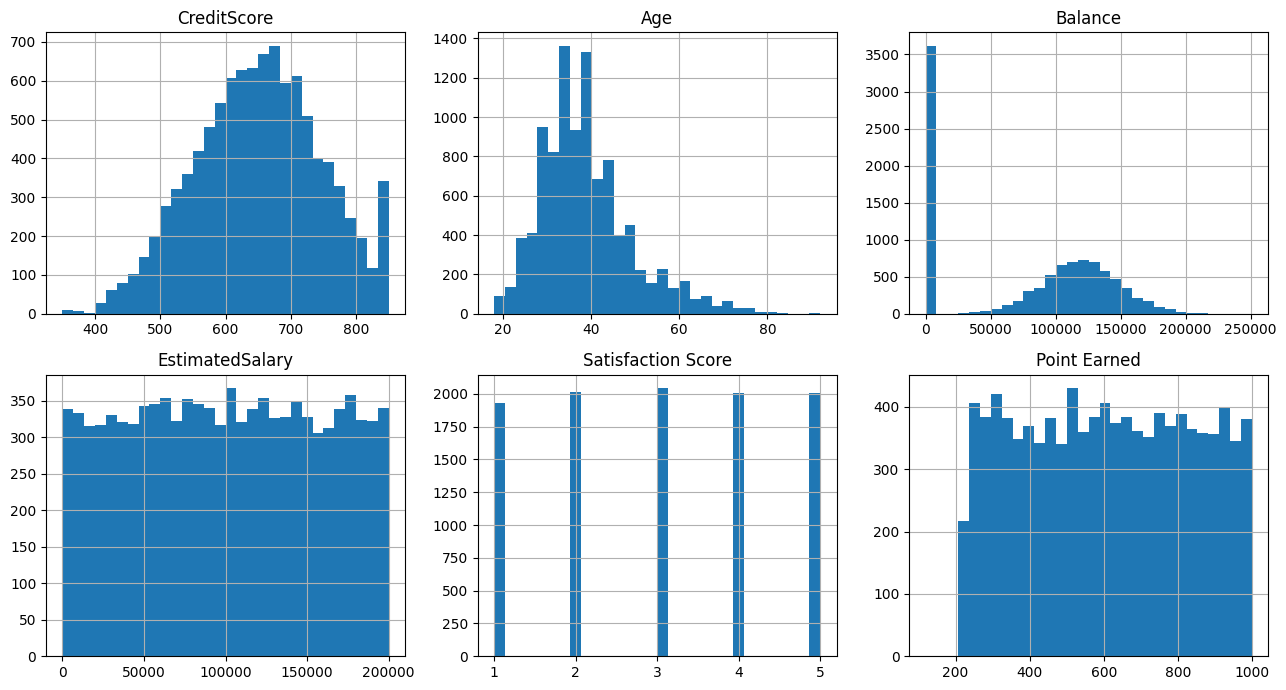

In [ ]:
varhist = [
    'CreditScore', 'Age', 'Balance',
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned'
]

fig,axes = plt.subplots(2,3,figsize=(13,7))
axes = axes.flatten()

for i, col in enumerate(varhist):
    df[col].hist(bins=30,ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

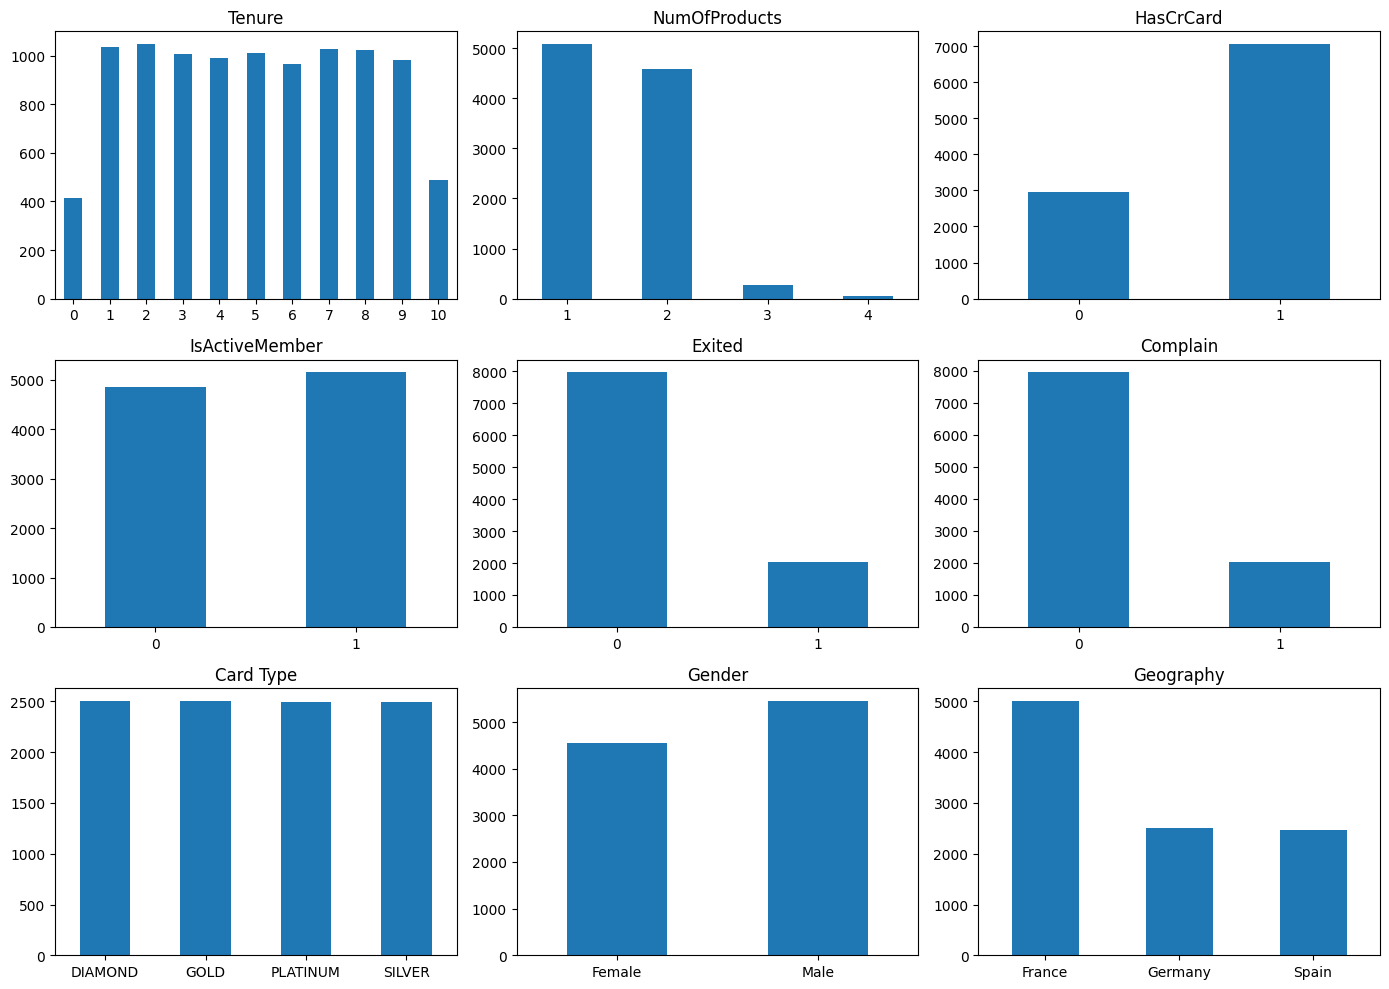

In [ ]:
varbar = [
    'Tenure', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember',
    'Exited', 'Complain','Card Type','Gender',"Geography"
]

fig,axes = plt.subplots(3,3,figsize = (14,10))
axes = axes.flatten()

for i, col in enumerate(varbar):
    df[col].value_counts().sort_index().plot(kind='bar',ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x',rotation=0)
    
plt.tight_layout()
plt.show()